In [1]:
#file1 = open('metrics_Upper.txt',mode='w')
import pandas as pd
import numpy as np
import datetime
from IPython import get_ipython
import matplotlib.pyplot as plt
from scipy.stats import pearsonr , spearmanr
import seaborn as sns
import contextlib
import time 

pd.set_option('display.max_columns', 100)

In [2]:

acc_600 = []
mse_600 = []

SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [4]:
df = pd.read_csv('data_complete_clean.csv', sep=',')

C:\Users\Abdallah\AppData\Local\Temp\ipykernel_24492\4156492823.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_complete_clean.csv', sep=',')


- HD [mm]: hole depth
- PR [dm/min]: penetration rate
- HP [bar]: hammering pressure
- FP [bar]: feed pressure = Hydraulic pressure that pushes the drill against the tunnel
face.
- DP [bar]: dumper pressure = Hydraulic pressure that absorbs the reaction force that
the drill receives from the bedrock. The harder the bedrock, the greater the dumper
pressure.
- RS [r/min]: rotation speed
- RP [bar]: rotation pressure
- WF [l/min]: water flow
- WP [bar]: water pressure
- Time [hh:mm:ss]

In [5]:
dfs = df[(df['Section number * 1000']>=555000)&(df['Section number * 1000']<=777000)].reset_index() 

In [6]:
dfs

,index,Unnamed: 0.1,Unnamed: 0,HD mm,PR dm/min,HP bar,FP bar,DP bar,RS r/min,RP bar,WF l/min,WP bar,Time,reference,Hole number,Hole type,Date and time at rockcontact,Boom,Section number * 1000,x\ty\tz\tmm,Lookout\tLookoutdirection(Degrees*10)\tsample interval(cm),Rig serial number,dir,number,file,x mm,y mm,z mm
0,1237,1237,0,101,0.00,124.68,25.25,43.25,189.74,35.95,72.37,19.26,07:20:48,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
1,1238,1238,1,201,28.38,128.53,29.10,43.25,187.95,36.81,70.03,17.98,07:20:50,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
2,1239,1239,2,304,34.42,131.09,30.39,43.67,183.47,36.38,70.91,17.55,07:20:52,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
3,1240,1240,3,408,32.28,129.38,28.68,44.52,182.58,36.81,70.61,18.83,07:20:54,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
4,1241,1241,4,508,37.57,129.81,31.24,44.52,179.89,37.24,65.63,13.70,07:20:56,../Data/MWD Raw Data/No524-750/No613/16072044.MWD,82,4,2021/06/16 07:20:44,1.0,667464.0,-7031\t408\t415,99\t-1437\t10,8.999310e+09,No524-750,613,16072044.MWD,-7031,408,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216569,598211,598211,1644,1869,52.15,179.77,59.92,49.61,196.90,53.93,66.80,17.98,19:16:11,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216570,598212,598212,1645,1975,57.76,179.77,59.92,49.61,186.16,47.51,67.68,18.40,19:16:12,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216571,598213,598213,1646,2079,61.54,180.62,60.35,49.18,186.16,47.51,67.68,18.40,19:16:13,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991
216572,598214,598214,1647,2182,51.94,179.77,60.35,49.61,181.68,53.50,67.68,17.55,19:16:14,../Data/MWD Raw Data/No524-750/No583/03191548.MWD,-14,4,2021/06/03 19:15:48,1.0,637107.0,-4927\t-1793\t-991,128\t-1054\t10,8.999310e+09,No524-750,583,03191548.MWD,-4927,-1793,-991


In [7]:
dfs['Date and time at rockcontact'] = pd.to_datetime(dfs['Date and time at rockcontact'])

In [8]:
selected_columns_0 = [
    #'Unnamed: 0', 
    #'Unnamed: 0.1', 
    'HD mm', 
    'PR dm/min', 
    'HP bar', 
    'FP bar',
    'DP bar', 
    'RS r/min', 
    'RP bar', 
    'WF l/min', 
    'WP bar', 
    #'Time',
    #'reference', 
    #'Hole number', 
    'Hole type', 
    #'Date and time at rockcontact',
    #'Boom', 
    'Section number * 1000', 
    #'x\ty\tz\tmm',
    #'Lookout\tLookoutdirection(Degrees*10)\tsample interval(cm)',
    #'Rig serial number', 
    #'dir', 
    'number', 
    #'reference',
    #'file', 
    #'x mm', 
    #'y mm', 
    #'z mm',
]

# ensure all numbers are numerical data

In [9]:
for c in selected_columns_0:
    dfs[c] = dfs[c].astype(str).str.replace(r"_", '').astype(float)
selected_columns = selected_columns_0 + ['Date and time at rockcontact']

datas = dfs[selected_columns]

# average data for a single borehole

In [9]:
Start = time.time()

datas_avg = pd.DataFrame()
for t in datas['Date and time at rockcontact'].unique():
    tmp = datas[datas['Date and time at rockcontact'] == t].reset_index(drop=True)
    datas_avg = datas_avg.append(tmp[selected_columns_0].mean(), ignore_index=True).reset_index(drop=True)
datas = datas_avg.copy()
datas

NameError: name 'datas' is not defined

# now the MWD data is clean and ready to add target variables

In [10]:
datas

NameError: name 'datas' is not defined

# add targets

In [11]:
expl = pd.read_csv('explosives.csv')

expl['upper \n/\nbottom']=expl['upper \n/\nbottom'].replace(['upper'],11)
expl['upper \n/\nbottom']=expl['upper \n/\nbottom'].replace(['bottom'],22)
expl['upper \n/\nbottom']=expl['upper \n/\nbottom'].replace(['upper & bottom'],33)

In [12]:
expl

,Unnamed: 0,tunnel support\n pattern,face\nNo.,upper \n/\nbottom,area\n[m2],progression\n[m],excavation \nvolume\n[m3],date,"wg3,piece","wg3,kg","wg25,piece","wg25,kg","wg,kg","anfo,kg","f06,piece","fconnect,piece","eldet,piece",pyro1,pyro2,pyro3,pyro4,pyro5,pyro6,pyro7,pyro8,pyro9,pyro10,pyro12,pyro14,pyro16,pyro17,pyro18,pyro19,pyro20,pyro21,total,kg/m3,faceN
0,0,C_,124,11,30.681,1.2,36.8,2020.9.18,63.0,6.3,0.0,0.0,0.0,40.0,5.0,5.0,1.0,0.0,0.0,2.0,2.0,6.0,13.0,11.0,21.0,6.0,2.0,0,0,0,0,0,0,0,0,63.0,1.26,124
1,1,C_,125,11,30.681,1.2,36.8,2020.9.18,83.0,8.3,0.0,0.0,0.0,59.0,7.0,7.0,1.0,2.0,5.0,8.0,7.0,6.0,11.0,12.0,24.0,6.0,2.0,0,0,0,0,0,0,0,0,83.0,1.83,125
2,2,D_-L,99-100,22,33.262,2.0,66.5,2020.9.23,22.0,2.2,0.0,0.0,11.7,20.0,3.0,4.0,1.0,0.0,0.0,0.0,7.0,10.0,3.0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,22.0,0.51,100
3,3,D_-L,101-102,22,33.262,2.0,66.5,2020.9.23,23.0,2.3,0.0,0.0,10.0,31.0,4.0,5.0,2.0,0.0,0.0,0.0,7.0,4.0,5.0,5.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,23.0,0.65,102
4,4,D_-L,103-104,22,33.262,1.0,33.3,2020.9.23,27.0,2.7,0.0,0.0,9.5,39.0,4.0,4.0,1.0,0.0,0.0,0.0,7.0,5.0,8.0,5.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,27.0,1.54,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,868,D_,1032,33,98.744,1.0,98.7,2021.12.8,0.0,0.0,488.0,48.8,0.0,65.0,8.0,8.0,1.0,9.0,12.0,11.0,16.0,6.0,6.0,7.0,8.0,6.0,2.0,0,0,0,0,0,0,0,0,83.0,0.66,1032
869,869,D_,1033,11,98.744,1.0,98.7,2021.12.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.00,1033
870,870,D_,1034,33,98.744,1.0,98.7,2021.12.9,0.0,0.0,450.0,45.0,0.0,52.0,8.0,8.0,1.0,10.0,12.0,10.0,15.0,10.0,8.0,4.0,5.0,6.0,2.0,0,0,0,0,0,0,0,0,82.0,0.53,1034
871,871,D_,1035,11,98.744,1.0,98.7,2021.12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.00,1035


In [13]:
expl.columns

Index(['Unnamed: 0', 'tunnel support\n pattern', 'face\nNo.',
       'upper \n/\nbottom', 'area\n[m2]', 'progression\n[m]',
       'excavation \nvolume\n[m3]', 'date', 'wg3,piece', 'wg3,kg',
       'wg25,piece', 'wg25,kg', 'wg,kg', 'anfo,kg', 'f06,piece',
       'fconnect,piece', 'eldet,piece', 'pyro1', 'pyro2', 'pyro3', 'pyro4',
       'pyro5', 'pyro6', 'pyro7', 'pyro8', 'pyro9', 'pyro10', 'pyro12',
       'pyro14', 'pyro16', 'pyro17', 'pyro18', 'pyro19', 'pyro20', 'pyro21',
       'total', 'kg/m3', 'faceN'],
      dtype='object')

# ensure all numbers are numerical data

In [14]:
expl_columns_tonum = ['area\n[m2]', 'progression\n[m]',
       'excavation \nvolume\n[m3]', 'wg3,piece', 'wg3,kg','upper \n/\nbottom',
       'wg25,piece', 'wg25,kg', 'wg,kg', 'anfo,kg', 'f06,piece',
       'fconnect,piece', 'eldet,piece', 'pyro1', 'pyro2', 'pyro3', 'pyro4',
       'pyro5', 'pyro6', 'pyro7', 'pyro8', 'pyro9', 'pyro10', 'pyro12',
       'pyro14', 'pyro16', 'pyro17', 'pyro18', 'pyro19', 'pyro20', 'pyro21',
       'total', 'kg/m3', 'faceN']

In [15]:
expl[expl_columns_tonum] = expl[expl_columns_tonum].apply(pd.to_numeric, errors='coerce')
expl.date = pd.to_datetime(expl.date)
expl = expl.dropna().reset_index(drop=True)

# add target values to MWD data

In [16]:
target_columns = ['excavation \nvolume\n[m3]', 'total','kg/m3','upper \n/\nbottom']
datas[target_columns] = 0
for exp in expl.faceN.unique():
    for col in target_columns:
        val = sum(expl[expl.faceN == exp][col])
        datas.loc[datas.number == exp,col]=val

NameError: name 'datas' is not defined

# now the dataset is ready for analysis

In [32]:
datas = datas[datas['upper \n/\nbottom']==11].reset_index(drop=True) # data points for upper holes only

# PCA 

In [33]:
#features = ['HD mm','PR dm/min','HP bar','FP bar','DP bar','RS r/min','RP bar','WF l/min','WP bar']
features = ['PR dm/min','HP bar','FP bar','DP bar','RS r/min','RP bar','WF l/min','WP bar']
#features = ['PR dm/min','HP bar','RS r/min']

X = datas.loc[:, features].values
            
x = StandardScaler().fit_transform(X)

components = len(features)    
pca = PCA(n_components=components)

principalComponents = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.31436782 0.22182356 0.13243357 0.11880699 0.09635825 0.04675517
 0.04393841 0.02551623]


In [34]:
pca.explained_variance_ratio_.transpose()

array([0.31436782, 0.22182356, 0.13243357, 0.11880699, 0.09635825,
       0.04675517, 0.04393841, 0.02551623])

In [35]:
pc = pd.DataFrame(principalComponents)

# add PCA results to main dataset

In [7]:
rf_datas = datas.join(pc)
rf_datas

NameError: name 'datas' is not defined

# Scree Plot

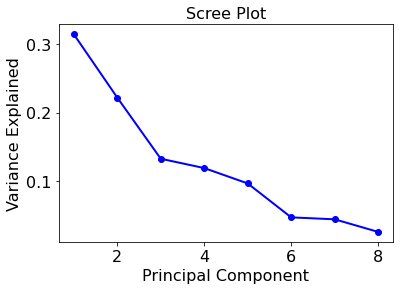

In [37]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


# Random forest

In [38]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.feature_selection import SelectFromModel # for important features selection

In [39]:
 columns = [ 'Hole type','FP bar', 'DP bar', 'RS r/min','RP bar', 'WF l/min', 
           'PR dm/min', 'HP bar','HD mm']+[0,1,2]

In [40]:
if columns == [ 'Hole type','FP bar', 'DP bar', 'RS r/min','RP bar', 'WF l/min', 
                'PR dm/min', 'HP bar','HD mm']+[0,1,2,3,4,5]:
    inputt = 'Features + first 6 components'
elif columns == [ 'Hole type','FP bar', 'DP bar', 'RS r/min','RP bar', 'WF l/min', 
                'PR dm/min', 'HP bar','HD mm']+[0,1,2]:
    inputt = 'Features + first 3 components'
elif columns == [ 'Hole type','FP bar', 'DP bar', 'RS r/min','RP bar', 'WF l/min', 
                    'PR dm/min', 'HP bar','HD mm']:
    inputt = 'Features only'
elif columns == [0,1,2]:
    inputt = 'First 3 components'
elif columns == [0,1,2,3,4,5]:
    inputt = 'First 6 components'
        
with open('metrics_Upper.txt', 'a') as o:
    with contextlib.redirect_stdout(o):
     print('The results of the upper boreholes dataset for the {} as input\n'.format(inputt))



# reshuffle the data and remove rows with "Zeros" 'kg/m3'


In [17]:
for i in range(0,10):
 rf_datas = rf_datas.sample(frac=1, replace = True).reset_index(drop=True)
 rf_datas.drop(rf_datas[rf_datas['kg/m3']==0].index, inplace=True) 
 rf_datas

# test train split

 columns = columns

 x = rf_datas[columns] # Features
 y = rf_datas['kg/m3'].values  # Target

 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# train RF

 rf = RandomForestRegressor(n_estimators = 600, random_state = 42)
 rf.fit(x_train, y_train)

# Predict with RF and evaluate


 prediction = rf.predict(x_test)
 mse = mean_squared_error(y_test, prediction)
 rmse = mse**.5
 abs_diff = np.array(np.abs((y_test - prediction)/y_test))
 mape = np.mean(abs_diff)*100
 accuracy = 100 - mape
 metrics = {'mse':[mse_600], 'accuracy':[acc_600]}
 mse_600.append(mse)
 acc_600.append(accuracy)
 
 with open('metrics_Upper.txt', 'a') as o:
     with contextlib.redirect_stdout(o):
        print(mse,rmse,mape, accuracy)
        
End = time.time()
with open('metrics_Upper.txt', 'a') as o:
    with contextlib.redirect_stdout(o):
       print('The elapsed time is {} Sec'.format(End-Start)) 

acc_600

NameError: name 'rf_datas' is not defined

# feature importance

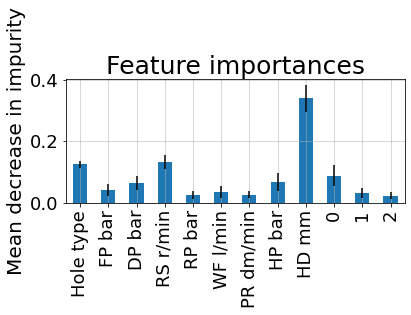

In [42]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances",fontsize = 25)
ax.set_ylabel("Mean decrease in impurity", fontsize = 20)
ax.grid(linewidth=0.5)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
fig.tight_layout()

# Important features selection

In [43]:
#Feature with importance values higher than the mean importance value
sel = SelectFromModel(RandomForestRegressor(n_estimators = 600))
sel.fit(x_train, y_train)
sel.get_support()
selected_feat= x_train.columns[(sel.get_support())]
print(selected_feat)

C:\Users\Abdallah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Index(['Hole type', 'RS r/min', 'HD mm', 0], dtype='object')


C:\Users\Abdallah\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Heatmap for PCs

AttributeError: 'NoneType' object has no attribute 'ax'

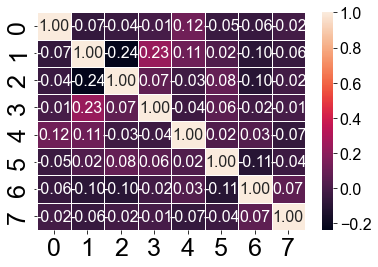

In [44]:
corr = spearmanr(pc,axis=0)[0]
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
sns.set(font_scale=1.4)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=25)

# visual check on pred and act

In [32]:

rf_out = pd.DataFrame(prediction, columns=['pred'])
rf_out['act'] = y_test
rf_out = rf_out.sort_values(by=['act']).reset_index(drop=True)
rf_out


,pred,act
0,0.320367,0.00
1,0.097217,0.00
2,0.174833,0.00
3,0.085517,0.00
4,0.157083,0.00
...,...,...
3532,0.923200,1.53
3533,1.468850,1.53
3534,1.337733,1.53
3535,1.499950,1.53


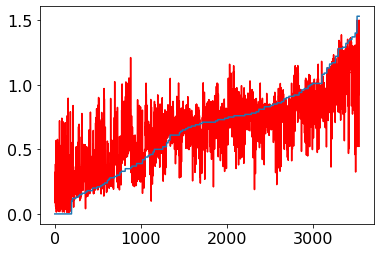

In [33]:
plt.plot(rf_out.pred, color='red')
plt.plot(rf_out.act)